In [363]:
#Importing Required Number of Libraries
#Importing Required Libraries
#_______________________________________________________________________________________________________________
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
#_______________________________________________________________________________________________________________
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [364]:
path='./train.csv'
path1='./test.csv'

In [365]:
def get_data():
    train = pd.read_csv("train.csv")
    test = pd.read_csv("test.csv")

    print(train.shape, test.shape)
    
    return train, test

In [366]:
train, test = get_data()

data = pd.concat([train, test], axis=0)
data['source'] = np.nan
data['source'].iloc[:train.shape[0]] = "train"
data['source'].iloc[train.shape[0]: ] = "test"
data.drop(['Interest_Rate'], axis=1, inplace=True)

print(data.shape)

(164309, 14) (109541, 13)
(273850, 14)


In [367]:
train["Loan_Amount_Requested"] =train['Loan_Amount_Requested'].str.replace(',','')
train["Loan_Amount_Requested"] =train['Loan_Amount_Requested'].astype(float)
test["Loan_Amount_Requested"] =test['Loan_Amount_Requested'].str.replace(',','')
test["Loan_Amount_Requested"] =test['Loan_Amount_Requested'].astype(float)

<Figure size 432x288 with 0 Axes>

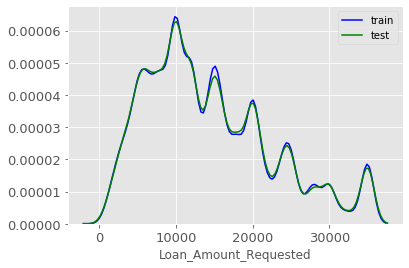

In [368]:
col = 'Loan_Amount_Requested'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

<Figure size 432x288 with 0 Axes>

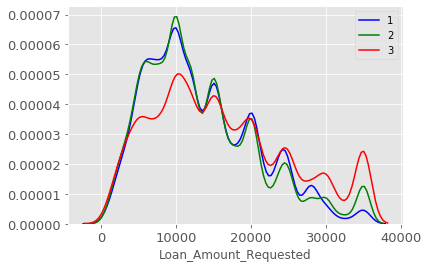

In [369]:
target = 'Interest_Rate'
plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1' , hist=False)
sns.distplot(train[col][train[target] == 2], color='g', label='2' , hist=False)
sns.distplot(train[col][train[target] == 3], color='r', label='3' , hist=False)
plt.legend(loc='best')
plt.show()

In [370]:
#Processing for length employed column
ord_len={ '< 1 year':1,'2 years':2,'3 years':3,'5 years':5,'6 years':6,'7 years':7,'8 years':8,'9 years':9,'10+ years':11
         }

train['Length_Employed']=train['Length_Employed'].map(ord_len)
test['Length_Employed']=test['Length_Employed'].map(ord_len)


train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.00,1.00,Rent,68000.00,not verified,car,18.37,0,nan,9,14,Female,1
1,10000002,30000.00,nan,Mortgage,nan,VERIFIED - income,debt_consolidation,14.93,0,17.00,12,24,Female,3
2,10000003,24725.00,7.00,Mortgage,75566.40,VERIFIED - income source,debt_consolidation,15.88,0,nan,12,16,Male,3
3,10000004,16000.00,1.00,NaN,56160.00,VERIFIED - income source,debt_consolidation,14.34,3,nan,16,22,Male,3
4,10000005,17000.00,8.00,Own,96000.00,VERIFIED - income source,debt_consolidation,22.17,1,nan,19,30,Female,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305,20725.00,11.00,Rent,nan,VERIFIED - income source,credit_card,13.56,0,nan,13,16,Male,2
164305,10164306,6000.00,8.00,Own,nan,VERIFIED - income source,small_business,9.12,0,36.00,13,30,Male,2
164306,10164307,20250.00,11.00,Mortgage,nan,VERIFIED - income,credit_card,18.17,1,nan,17,30,Male,1
164307,10164308,10000.00,nan,Rent,nan,not verified,major_purchase,18.75,1,48.00,16,62,Female,3


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

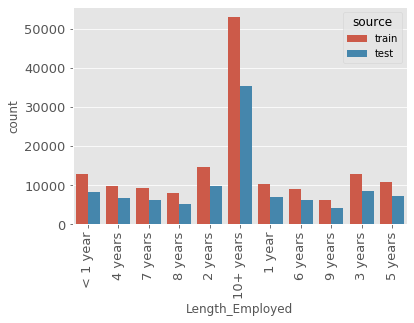

In [371]:
col = 'Length_Employed'
plt.xticks(rotation=90)
sns.countplot(data[col], hue=data['source'])

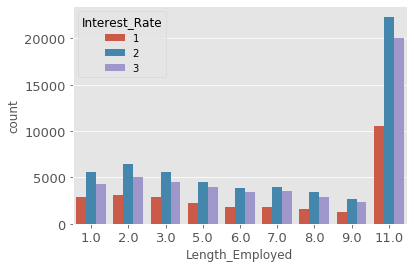

In [372]:
sns.countplot(train[col], hue=train['Interest_Rate'])

In [373]:
#train.drop(['Length_Employed','Months_Since_Deliquency'],1,inplace=True)
train['Length_Employed'].fillna(0,inplace=True)

In [374]:
#train=pd.concat([train,X],1)

In [375]:
income_ord={'VERIFIED - income':1,'VERIFIED - income source':1,'not verified':0}
train['Income_Verified']=train['Income_Verified'].map(income_ord)

income_ord_test={'VERIFIED - income':1,'VERIFIED - income source':0,'not verified':0}
test['Income_Verified']=test['Income_Verified'].map(income_ord_test)

gender_ord={'Male':1,'Female':0}
train['Gender']=train['Gender'].map(gender_ord)

test['Gender']=test['Gender'].map(gender_ord)


In [376]:
test

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender
0,10164310,27500.00,11.00,Mortgage,129000.00,1,debt_consolidation,12.87,0,68.00,10,37,1
1,10164311,26000.00,11.00,NaN,110000.00,0,credit_card,11.37,0,nan,6,23,1
2,10164312,6075.00,1.00,Rent,75000.00,1,debt_consolidation,6.83,2,nan,5,20,1
3,10164313,12000.00,11.00,Mortgage,73000.00,0,debt_consolidation,7.76,0,nan,6,8,1
4,10164314,35000.00,1.00,Mortgage,156000.00,0,debt_consolidation,9.62,0,26.00,9,21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,15000.00,9.00,Mortgage,120000.00,1,other,8.15,2,32.00,13,57,1
109537,10273847,9600.00,11.00,Mortgage,125000.00,0,credit_card,9.08,1,17.00,9,34,1
109538,10273848,2000.00,5.00,Rent,37850.00,0,credit_card,11.60,0,nan,10,11,1
109539,10273849,2125.00,6.00,Rent,30000.00,0,other,24.88,0,nan,5,6,1


In [377]:
train=pd.get_dummies(train,columns=['Home_Owner','Purpose_Of_Loan'])
test=pd.get_dummies(test,columns=['Home_Owner','Purpose_Of_Loan'])


In [378]:
test['Income_Verified'].value_counts()

0    69886
1    39655
Name: Income_Verified, dtype: int64

In [379]:
train.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding'],
      dtype='object')

In [380]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=9)
train=imp_mean.fit_transform(train)

In [381]:
train=pd.DataFrame(train)

In [382]:
train.columns=['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding']

In [383]:
train

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10000001.00,7000.00,1.00,68000.00,0.00,18.37,0.00,37.75,9.00,14.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,10000002.00,30000.00,0.00,107365.58,1.00,14.93,0.00,17.00,12.00,24.00,0.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,10000003.00,24725.00,7.00,75566.40,1.00,15.88,0.00,32.55,12.00,16.00,1.00,3.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,10000004.00,16000.00,1.00,56160.00,1.00,14.34,3.00,35.42,16.00,22.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,10000005.00,17000.00,8.00,96000.00,1.00,22.17,1.00,35.88,19.00,30.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164304,10164305.00,20725.00,11.00,86838.63,1.00,13.56,0.00,35.52,13.00,16.00,1.00,2.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
164305,10164306.00,6000.00,8.00,75998.40,1.00,9.12,0.00,36.00,13.00,30.00,1.00,2.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
164306,10164307.00,20250.00,11.00,104658.38,1.00,18.17,1.00,34.74,17.00,30.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
164307,10164308.00,10000.00,0.00,78871.67,0.00,18.75,1.00,48.00,16.00,62.00,0.00,3.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [384]:
test.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding'],
      dtype='object')

In [385]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=9)
test=imp_mean.fit_transform(test)
test=pd.DataFrame(test)

In [386]:
test.columns=['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding']

In [387]:
test

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Home_Owner_Mortgage,Home_Owner_None,Home_Owner_Other,Home_Owner_Own,Home_Owner_Rent,Purpose_Of_Loan_car,Purpose_Of_Loan_credit_card,Purpose_Of_Loan_debt_consolidation,Purpose_Of_Loan_educational,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10164310.00,27500.00,11.00,129000.00,1.00,12.87,0.00,68.00,10.00,37.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,10164311.00,26000.00,11.00,110000.00,0.00,11.37,0.00,33.15,6.00,23.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,10164312.00,6075.00,1.00,75000.00,1.00,6.83,2.00,37.32,5.00,20.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,10164313.00,12000.00,11.00,73000.00,0.00,7.76,0.00,34.08,6.00,8.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,10164314.00,35000.00,1.00,156000.00,0.00,9.62,0.00,26.00,9.00,21.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846.00,15000.00,9.00,120000.00,1.00,8.15,2.00,32.00,13.00,57.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
109537,10273847.00,9600.00,11.00,125000.00,0.00,9.08,1.00,17.00,9.00,34.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109538,10273848.00,2000.00,5.00,37850.00,0.00,11.60,0.00,36.65,10.00,11.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
109539,10273849.00,2125.00,6.00,30000.00,0.00,24.88,0.00,37.50,5.00,6.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00


In [388]:
#Creating new csv files
train.to_csv('new_train.csv')

In [389]:
#creating new test csv file
test.to_csv('new_test.csv')